In [40]:
import numpy as np
import statistics 
import math
import matplotlib.pyplot as plt
mu, sigma = 0, 0.1 # mean and standard deviation
floats = np.random.normal(scale=3, size=100)
randomInts = np.round(floats)
print(randomInts)

#normal distrubution formula
def normdf(x, mean, sd): 
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

def normdf2(x, mean, sd):
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = np.exp(-( x - mean)**2/(2*var))
    return num/denom

[-1.  0. -3.  3. -0. -1.  3.  2.  4. -1. -0.  3. -0. -3.  1.  1.  1. -0.
 -2. -2.  2. -2.  3.  1. -0.  2. -1. -9.  5.  3.  1. -5. -1.  1.  2.  1.
 -2.  3. -3.  6. -5.  0.  4.  0. -1.  0.  5.  0. -9.  3. -7.  0.  3. -0.
  1.  0.  1. -2.  1.  1. -5. -6.  0.  4.  0. -0. -2.  4. -5. -3.  2.  4.
  5. -7. -3.  0.  1.  1. -6.  1.  0.  2.  1. -3.  2.  0. -1.  1. -1. -3.
  4.  5.  5.  0.  0.  6.  4. -3. -1. -1.]


In [41]:
median = statistics.median(randomInts)
sigma = statistics.stdev(randomInts)
print("median:{}, sigma:{}".format(median, sigma))

median:0.0, sigma:3.117545654692311


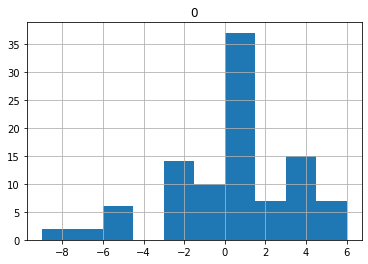

In [42]:
import pandas as pd
d=pd.DataFrame(randomInts)
data=d.hist()

In [43]:
hist={}
for el in randomInts:
    if el in hist: hist[int(el)]=hist[el]+1
    if el not in hist: hist[int(el)]=1
hist=dict(sorted(hist.items()))
hist_df=pd.DataFrame(hist.items(), columns=['x','y'])
hist_df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
x,-9,-7,-6,-5,-3,-2,-1,0,1,2,3,4,5,6
y,2,2,2,4,8,6,10,21,16,7,8,7,5,2


In [59]:
ss1=[d for d in range(-7,7)]
#ss2=[round(normdf(d, median, sigma)*100) for d in range(-7,7)]
ss2=[round(normdf(d, 1, 1)*100) for d in range(-7,7)]

normal_distribution=pd.DataFrame([ss1,ss2]).transpose()
normal_distribution.columns=['x','y']
normal_distribution.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
x,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6
y,0,0,0,0,0,0,5,24,40,24,5,0,0,0


In [60]:
dist_error=pd.DataFrame()
dist_error['x']=normal_distribution['x']
dist_error['data']=hist_df['y']
dist_error['gauss']=normal_distribution['y']
dist_error['error']=abs(dist_error['data']-dist_error['gauss'])
dist_error.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
x,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6
data,2,2,2,4,8,6,10,21,16,7,8,7,5,2
gauss,0,0,0,0,0,0,5,24,40,24,5,0,0,0
error,2,2,2,4,8,6,5,3,24,17,3,7,5,2


No handles with labels found to put in legend.


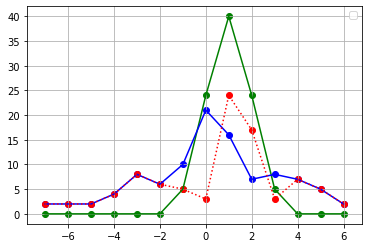

In [63]:
#plt.plot(hist_df['x'], hist_df['y'], color='green')
plt.scatter(x=dist_error['x'], y=dist_error['gauss'], color='green')
plt.plot(p['x'], dist_error['gauss'], color='green')

plt.scatter(x=dist_error['x'], y=dist_error['data'], color='blue')
plt.plot(p['x'], dist_error['data'], color='blue')

plt.scatter(x=dist_error['x'], y=dist_error['error'], color='red')
plt.plot(p['x'], dist_error['error'], color='red', linestyle=':')

plt.legend()
plt.grid()

In [69]:
def gen_chart(median, sigma, randomInts):
    hist={}
    for el in randomInts:
        if el in hist: hist[int(el)]=hist[el]+1
        if el not in hist: hist[int(el)]=1
    hist=dict(sorted(hist.items()))
    hist_df=pd.DataFrame(hist.items(), columns=['x','y'])
    #################
    ss1=[d for d in range(-7,7)]
    #ss2=[round(normdf(d, median, sigma)*100) for d in range(-7,7)]
    ss2=[round(normdf(d, median, sigma)*100) for d in range(-7,7)]

    normal_distribution=pd.DataFrame([ss1,ss2]).transpose()
    normal_distribution.columns=['x','y']
    #################
    dist_error=pd.DataFrame()
    dist_error['x']=normal_distribution['x']
    dist_error['data']=hist_df['y']
    dist_error['gauss']=normal_distribution['y']
    dist_error['error']=abs(dist_error['data']-dist_error['gauss'])
    mse=statistics.stdev(dist_error['error'])
    print(mse)
    #################
    plt.scatter(x=dist_error['x'], y=dist_error['gauss'], color='green')
    plt.plot(p['x'], dist_error['gauss'], color='green')

    plt.scatter(x=dist_error['x'], y=dist_error['data'], color='blue')
    plt.plot(p['x'], dist_error['data'], color='blue')

    plt.scatter(x=dist_error['x'], y=dist_error['error'], color='red')
    plt.plot(p['x'], dist_error['error'], color='red', linestyle=':')

    plt.legend()
    plt.grid()

No handles with labels found to put in legend.


2.1122354181147664


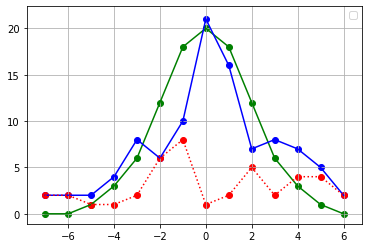

In [77]:
gen_chart(median=0, sigma=2, randomInts=randomInts)